In [32]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [33]:
# read the datase into pandas to observe the dataset
ads_df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
ads_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [34]:
ads_df.shape

(200, 4)

The imported dataset incldes 200 observations, 4 variables.

According to the original data source - **TV**, **radio** and **newspaper** columns refer to $1000s spent on advertisement through respective channels, where as **sales** is the number of units of goods sold. Thus the advertisement channels will be used as *features* and the sales variable will be the *responce* in our dataset.

Each observation of 200 in this dataset represents a single market.

Because this is a continuous dataset Liner regression model should be a fitting choice.

In [35]:
ads_df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Looking at the data TV is the most expencive channel of advertisement.

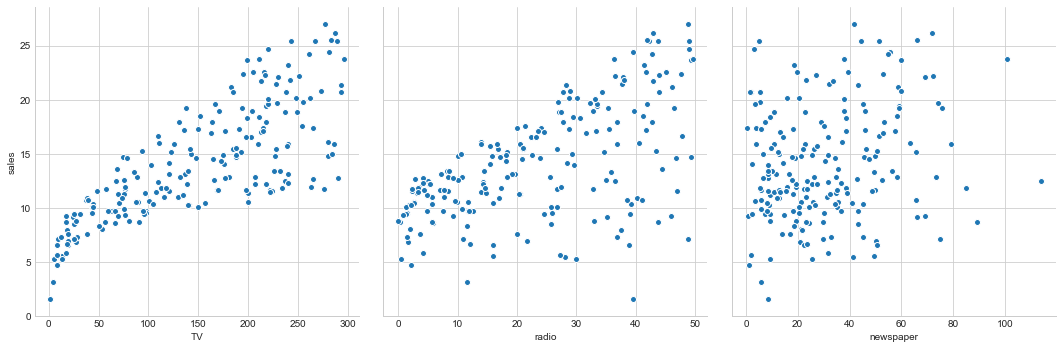

In [36]:
# Visualising relationship between each of features and the responce variables
# using an inbuilt seaborn function Pairplot which prints multiple distribution plots
# of each feature and the responce.
sns.pairplot(ads_df, x_vars = ['TV','radio','newspaper'], y_vars = 'sales', size = 5);

# Preparing data for the model

Assign data to the feature matrix 'X' and the responce vectore 'y'.

In [37]:
# Identify feature columns
features = ["TV","radio","newspaper"]

# Create a subset of data as feature matrix
X = ads_df[features]
# Assign responce vector, it will have to be a numPy array
y = ads_df['sales']

Split X and y into train and test functions

In [38]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

In [39]:
# Verify
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


# Multiple Linear Regression model

In [40]:
from sklearn.linear_model import LinearRegression
# instantiate
linreg = LinearRegression()
# fit the model
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Interpreting model coefficients

In [41]:
print(linreg.intercept_)
# pair the feature names with the coefficients
list(zip(features, linreg.coef_))

2.87696662232


[('TV', 0.046564567874150281),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111804347)]

### Linear regression
Pros: fast, no tuning required, highly interpretable, well-understood

Cons: unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

Form of linear regression
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

$y$ is the response
$\beta_0$ is the intercept
$\beta_1$ is the coefficient for $x_1$ (the first feature)
$\beta_n$ is the coefficient for $x_n$ (the nth feature)
In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the model coefficients. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

____________________
**The given numbers result in following:**
$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$
Interpreting a **TV coefficient**
- For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.  

Similarly **radio coefficient** may be interpreted as follows:

- An additional $1000 ("unit") of ad spending on radio advertisement is associated with an increase in sales of 179 items; provided that TV and newspaper sales are constant.

**Newspaper coefficient** may be interpreted as follows:
- For a given amount of Radio and TV ad spending, an additional $1,000 spent on newspaper ads is associated with an increase in sales of just 3.5 items.

Important notes:

- This is a statement of association, not causation, thus we cannot specifically state that one or the other advertisement channel is directly attributed to increase in sales.
- If an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative.

[(Interpretation credit)](https://www.youtube.com/watch?v=3ZWuPVWq7p4&index=7&t=5s&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A)

### Model prediction
Final step for this process is trying to predict the outcome based on out of training samle data.

In [16]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
print (y_pred)

[ 21.70910292  16.41055243   7.60955058  17.80769552  18.6146359
  23.83573998  16.32488681  13.43225536   9.17173403  17.333853
  14.44479482   9.83511973  17.18797614  16.73086831  15.05529391
  15.61434433  12.42541574  17.17716376  11.08827566  18.00537501
   9.28438889  12.98458458   8.79950614  10.42382499  11.3846456
  14.98082512   9.78853268  19.39643187  18.18099936  17.12807566
  21.54670213  14.69809481  16.24641438  12.32114579  19.92422501
  15.32498602  13.88726522  10.03162255  20.93105915   7.44936831
   3.64695761   7.22020178   5.9962782   18.43381853   8.39408045
  14.08371047  15.02195699  20.35836418  20.57036347  19.60636679]


### Plotting the least square line for predictions

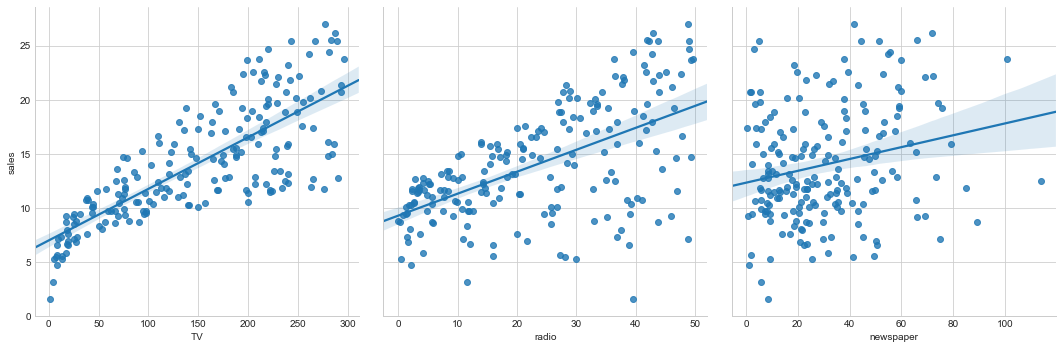

In [27]:
sns.pairplot(ads_df, x_vars=['TV','radio','newspaper'], y_vars='sales', size=5, kind='reg');

### Confidence intervals

# Model evaluation